In [19]:
# Import libraries and modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

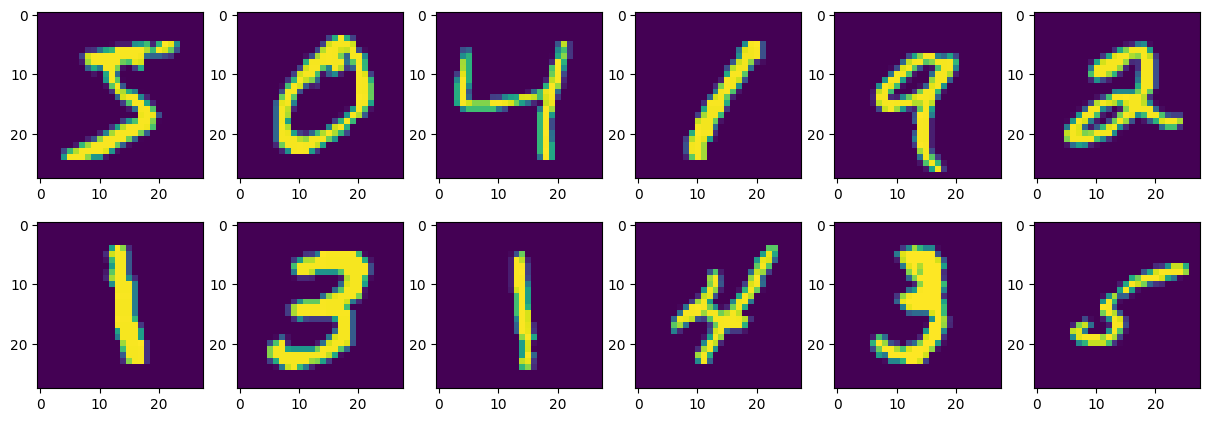

In [21]:
from matplotlib.colors import Colormap
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
 ax[i].imshow(X_train[i].reshape(28,28))

plt.show()

In [22]:
X_train.shape

(60000, 28, 28)

In [24]:
# Data preprocessing
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# Build the model without convolutional layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2857 - accuracy: 0.9189 - val_loss: 0.1504 - val_accuracy: 0.9575
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1292 - accuracy: 0.9623 - val_loss: 0.1175 - val_accuracy: 0.9644
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0885 - accuracy: 0.9740 - val_loss: 0.1098 - val_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.1099 - val_accuracy: 0.9680
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0948 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0892 - val_accuracy: 0.9732
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0882 - val_accuracy

In [11]:
tf.__version__

'2.12.0'

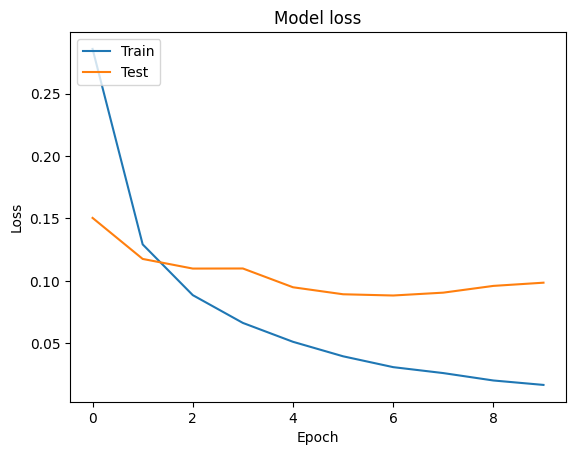

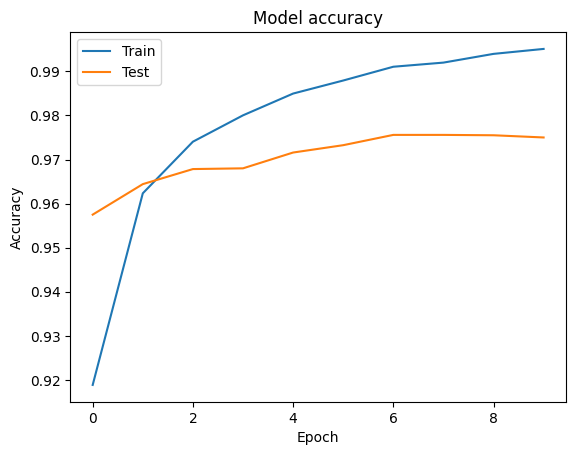

In [12]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot the training and validation accuracy
plt.plot(history.history['accuracy']) #change it to "acc" if you are using TF version 1
plt.plot(history.history['val_accuracy']) # change it to "val_acc" if you are using TF
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09722130745649338
Test accuracy: 0.9729999899864197


In [14]:
# Predict the class of an image
img = X_test[0]
img = img.reshape(1, 28, 28, 1)
predictions = model.predict(img)
print(np.argmax(predictions))

1/1 [==============================] - 0s 85ms/step
7


In [15]:
X_test.shape

(10000, 28, 28, 1)

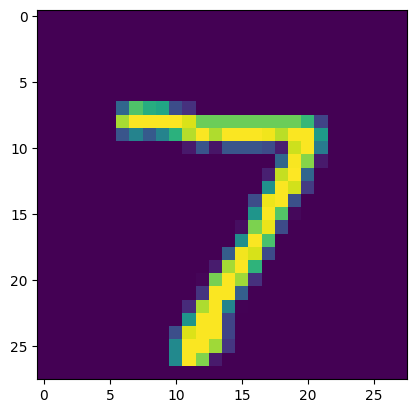

In [16]:
plt.imshow(X_test[0].reshape(28,28))
plt.show()

In [17]:
predictions

array([[3.5164930e-11, 9.6487251e-14, 2.5296668e-08, 8.9691584e-06,
        3.4835792e-16, 3.9770301e-12, 2.6775228e-16, 9.9999106e-01,
        1.0509914e-09, 9.1458352e-09]], dtype=float32)